# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import random
import seaborn as sns
import urllib
from citipy import citipy
from scipy.stats import linregress
from urllib.error import HTTPError

from random import uniform
from datetime import datetime
import requests
from pprint import pprint
# Import API key
from api_keys import api_key


# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 
    

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}"
query_url = f"{url}appid=api_key&units=&q=" + api_key  

# Set up lists for dataframe
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_with_data = []
cities_not_found = []
record = 1
set_count = 1

print("Beginning Data Retrieval")
print("------------------------------")
# For loop will retrieve data from API and append to corresponding lists
for city in cities:
    weather_response = requests.get(query_url + city).json()
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    # If statement will check if the record count is within 50. 
    # After 50 records are processed, the script will sleep for 5 seconds.
    # This is to stay within limitations of max API calls per minute.
    if record < 50:
        # For any city that data cannot be retrieved, the try-except will skip
        # and load any cities into cities_not_found list to later check if number of
        # processed records fall within expectation.
        try:
            cities_with_data.append(weather_response['name'])
            lat.append(weather_response['coord']['lat'])
            lon.append(weather_response['coord']['lon'])
            max_temp.append(weather_response['main']['temp_max'])
            humidity.append(weather_response['main']['humidity'])
            cloudiness.append(weather_response['clouds']['all'])
            wind_speed.append(weather_response['wind']['speed'])
            country.append(weather_response['sys']['country'])
            date.append(weather_response['dt'])
        except:
            print(f"City '{city}' not found. Skipping...")
            cities_not_found.append(city)

        record+=1
    else:
        time.sleep(5)
        record = 1
        set_count+=1

print("---------------------------")
print(f"Data Retrieval Complete.\nProcessed {len(cities_with_data)} number of cities.\n{len(cities_not_found)} cities not found.")
print("---------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | eshowe
City 'eshowe' not found. Skipping...
Processing Record 2 of Set 1 | sungairaya
City 'sungairaya' not found. Skipping...
Processing Record 3 of Set 1 | narsaq
City 'narsaq' not found. Skipping...
Processing Record 4 of Set 1 | new norfolk
City 'new norfolk' not found. Skipping...
Processing Record 5 of Set 1 | vostok
City 'vostok' not found. Skipping...
Processing Record 6 of Set 1 | yulara
City 'yulara' not found. Skipping...
Processing Record 7 of Set 1 | beloha
City 'beloha' not found. Skipping...
Processing Record 8 of Set 1 | qaanaaq
City 'qaanaaq' not found. Skipping...
Processing Record 9 of Set 1 | mataura
City 'mataura' not found. Skipping...
Processing Record 10 of Set 1 | ugoofaaru
City 'ugoofaaru' not found. Skipping...
Processing Record 11 of Set 1 | turukhansk
City 'turukhansk' not found. Skipping...
Processing Record 12 of Set 1 | hilo
City 'hilo' not found. Skipping...
Processin

Processing Record 5 of Set 3 | garissa
City 'garissa' not found. Skipping...
Processing Record 6 of Set 3 | puerto ayora
City 'puerto ayora' not found. Skipping...
Processing Record 7 of Set 3 | castrillon
City 'castrillon' not found. Skipping...
Processing Record 8 of Set 3 | bredasdorp
City 'bredasdorp' not found. Skipping...
Processing Record 9 of Set 3 | zachagansk
City 'zachagansk' not found. Skipping...
Processing Record 10 of Set 3 | moundsville
City 'moundsville' not found. Skipping...
Processing Record 11 of Set 3 | kilindoni
City 'kilindoni' not found. Skipping...
Processing Record 12 of Set 3 | cayangwan
City 'cayangwan' not found. Skipping...
Processing Record 13 of Set 3 | saint-pierre
City 'saint-pierre' not found. Skipping...
Processing Record 14 of Set 3 | kaitangata
City 'kaitangata' not found. Skipping...
Processing Record 15 of Set 3 | alta floresta
City 'alta floresta' not found. Skipping...
Processing Record 16 of Set 3 | bargal
City 'bargal' not found. Skipping...

Processing Record 6 of Set 5 | kutum
City 'kutum' not found. Skipping...
Processing Record 7 of Set 5 | vila velha
City 'vila velha' not found. Skipping...
Processing Record 8 of Set 5 | lebanon
City 'lebanon' not found. Skipping...
Processing Record 9 of Set 5 | baculin
City 'baculin' not found. Skipping...
Processing Record 10 of Set 5 | codrington
City 'codrington' not found. Skipping...
Processing Record 11 of Set 5 | salinopolis
City 'salinopolis' not found. Skipping...
Processing Record 12 of Set 5 | wulanhaote
City 'wulanhaote' not found. Skipping...
Processing Record 13 of Set 5 | lappeenranta
City 'lappeenranta' not found. Skipping...
Processing Record 14 of Set 5 | esperance
City 'esperance' not found. Skipping...
Processing Record 15 of Set 5 | dandong
City 'dandong' not found. Skipping...
Processing Record 16 of Set 5 | lagoa
City 'lagoa' not found. Skipping...
Processing Record 17 of Set 5 | darhan
City 'darhan' not found. Skipping...
Processing Record 18 of Set 5 | walvis

Processing Record 9 of Set 7 | bonavista
City 'bonavista' not found. Skipping...
Processing Record 10 of Set 7 | port hedland
City 'port hedland' not found. Skipping...
Processing Record 11 of Set 7 | alice springs
City 'alice springs' not found. Skipping...
Processing Record 12 of Set 7 | margate
City 'margate' not found. Skipping...
Processing Record 13 of Set 7 | coos bay
City 'coos bay' not found. Skipping...
Processing Record 14 of Set 7 | geraldton
City 'geraldton' not found. Skipping...
Processing Record 15 of Set 7 | sinnamary
City 'sinnamary' not found. Skipping...
Processing Record 16 of Set 7 | hami
City 'hami' not found. Skipping...
Processing Record 17 of Set 7 | bonthe
City 'bonthe' not found. Skipping...
Processing Record 18 of Set 7 | santa isabel do rio negro
City 'santa isabel do rio negro' not found. Skipping...
Processing Record 19 of Set 7 | winslow
City 'winslow' not found. Skipping...
Processing Record 20 of Set 7 | darnah
City 'darnah' not found. Skipping...
Pro

Processing Record 12 of Set 9 | azimur
City 'azimur' not found. Skipping...
Processing Record 13 of Set 9 | afgoye
City 'afgoye' not found. Skipping...
Processing Record 14 of Set 9 | umm lajj
City 'umm lajj' not found. Skipping...
Processing Record 15 of Set 9 | attawapiskat
City 'attawapiskat' not found. Skipping...
Processing Record 16 of Set 9 | banepa
City 'banepa' not found. Skipping...
Processing Record 17 of Set 9 | luanda
City 'luanda' not found. Skipping...
Processing Record 18 of Set 9 | baherden
City 'baherden' not found. Skipping...
Processing Record 19 of Set 9 | northam
City 'northam' not found. Skipping...
Processing Record 20 of Set 9 | kysyl-syr
City 'kysyl-syr' not found. Skipping...
Processing Record 21 of Set 9 | nchelenge
City 'nchelenge' not found. Skipping...
Processing Record 22 of Set 9 | gwanda
City 'gwanda' not found. Skipping...
Processing Record 23 of Set 9 | metkovic
City 'metkovic' not found. Skipping...
Processing Record 24 of Set 9 | kogon
City 'kogon'

Processing Record 15 of Set 11 | sabang
City 'sabang' not found. Skipping...
Processing Record 16 of Set 11 | soyo
City 'soyo' not found. Skipping...
Processing Record 17 of Set 11 | sagaing
City 'sagaing' not found. Skipping...
Processing Record 18 of Set 11 | kisesa
City 'kisesa' not found. Skipping...
Processing Record 19 of Set 11 | indiana
City 'indiana' not found. Skipping...
Processing Record 20 of Set 11 | galesong
City 'galesong' not found. Skipping...
Processing Record 21 of Set 11 | varhaug
City 'varhaug' not found. Skipping...
Processing Record 22 of Set 11 | buchanan
City 'buchanan' not found. Skipping...
Processing Record 23 of Set 11 | bayeux
City 'bayeux' not found. Skipping...
Processing Record 24 of Set 11 | baykit
City 'baykit' not found. Skipping...
Processing Record 25 of Set 11 | vozrozhdeniye
City 'vozrozhdeniye' not found. Skipping...
Processing Record 26 of Set 11 | atambua
City 'atambua' not found. Skipping...
Processing Record 27 of Set 11 | changzhou
City 'c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Create and display DataFrame
city_data = pd.DataFrame({
    "City": cities_with_data,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [40]:
# Load DataFrame to csv file to later use in Part II
city_data.to_csv(output_data_file, encoding='utf-8')

In [41]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [42]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
# Drops any rows where humidity is higher than 100
clean_city_data = city_data[city_data['Humidity'] <= 100]

# Recalculates and displays statistical analysis after any rows are dropped
clean_city_stats = clean_city_data.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
clean_city_stats_2 = clean_city_data[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].quantile([.25, .5, .75])
clean_city_stats = pd.concat([clean_city_stats, clean_city_stats_2])
clean_city_stats.set_axis(['count', 'mean', 'std', 'min', 'max', '25%', '50%', '75%'], axis='index', inplace=True)
clean_city_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

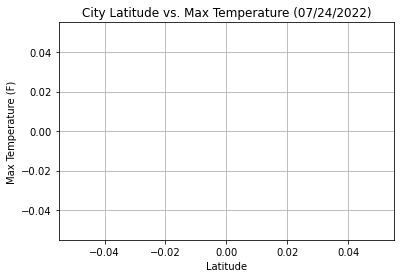

In [27]:
# City Latitude vs Max Temperature (07/24/2022)
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Max Temperature (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Images/LatitudeVsTemp.png")

plt.show()

## Latitude vs. Humidity Plot

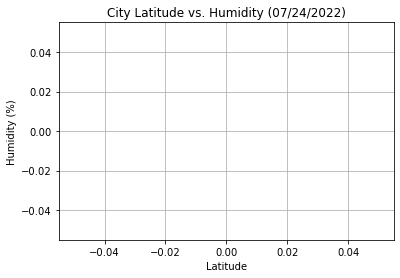

In [44]:
# City Latitude vs Humidity (07/24/2022)
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Humidity (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsHum.png")

plt.show()

## Latitude vs. Cloudiness Plot

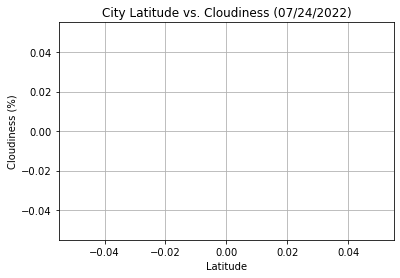

In [29]:
# City Latitude vs Cloudiness (07/24/2022)
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Cloudiness (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/LatitudeVsClouds.png")

plt.show()

## Latitude vs. Wind Speed Plot

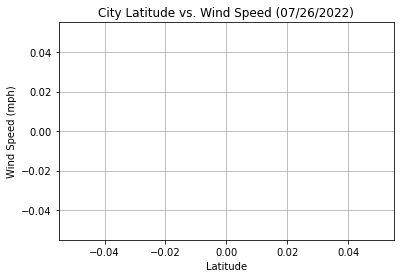

In [45]:
# City Latitude vs Wind Speed (07/24/2022)
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Wind Speed (07/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsWindSpeed.png")

plt.show()

## Linear Regression

In [46]:
# Splits the city weather data between north and south hemisphere for further linear regression computations.
south_hemi = clean_city_data[clean_city_data['Lat'] < 0]
north_hemi = clean_city_data[clean_city_data['Lat'] > 0]
print(f"# Northern Hemisphere Cities: {len(north_hemi)}.\n# Southern Hemisphere Cities: {len(south_hemi)}.")

# Northern Hemisphere Cities: 0.
# Southern Hemisphere Cities: 0.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
xValues = north_hemi['Lat']
yValues = north_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (10,275), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("Images/NorthHemiCityLatitudeVsMaxTempRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [48]:
xValues = south_hemi['Lat']
yValues = south_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-30,275), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("Images/SouthHemiCityLatitudeVsMaxTempRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [49]:
xValues = north_hemi['Lat']
yValues = north_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (50,10), fontsize=13, color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/NorthCityLatitudeVsHumidityRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [50]:
xValues = south_hemi['Lat']
yValues = south_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-53,30), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/SouthLatitudeVsHumidityRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [51]:
xValues = north_hemi['Lat']
yValues = north_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/NorthHemiLatitudeVsCloudinessRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [52]:

xValues = south_hemi['Lat']
yValues = south_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-53,30), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/SouthHemiLatitudeVsCloudinessRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [53]:
xValues = north_hemi['Lat']
yValues = north_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (20,12), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/NorthHemiLatitudeVsWindSpeedRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [54]:
xValues = south_hemi['Lat']
yValues = south_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-53,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/SouthHemiLatitudeVsWindSpeedRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

ValueError: Inputs must not be empty.